# Simple Linear Regression (One Input Future) 

In [815]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [816]:
hw_df = pd.read_csv("./placement.csv")

# hw_df = pd.read_csv("./HeightWeight.csv")
# hw_df.drop("Index", axis= 1, inplace=True)
# Drop the last 5 rows
# hw_df = hw_df.iloc[:-24800]

hw_df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [817]:
hw_df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


In [818]:
hw_df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


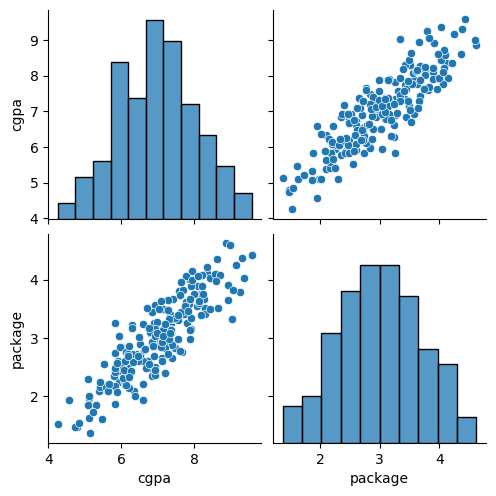

In [819]:
sns.pairplot(hw_df)

In [820]:
X = hw_df.iloc[:,:-1]
y = hw_df.iloc[:,-1]
X.shape, y.shape

((200, 1), (200,))

In [821]:
# Train and Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((140, 1), (140,))

In [822]:
# Standardized the data (X)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


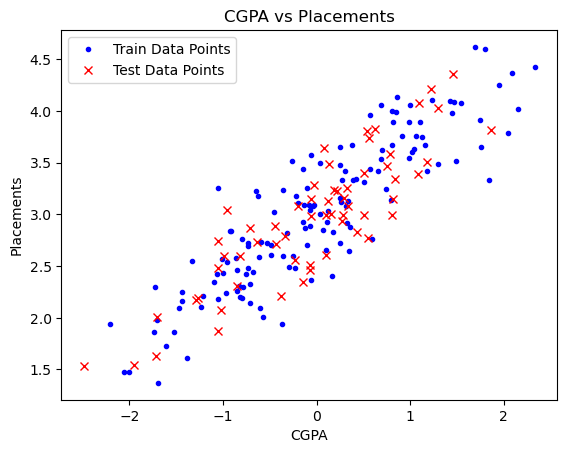

In [823]:
plt.plot(X_train, y_train, "b.", label="Train Data Points")
plt.plot(X_test, y_test, "rx", label="Test Data Points")
plt.xlabel("CGPA")
plt.ylabel("Placements")
plt.title("CGPA vs Placements")
plt.legend()
plt.show()


In [824]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
m = LinearRegression()
m.fit(X_train, y_train)
y_pred_test = m.predict(X_test)
y_pred_train = m.predict(X_train)

print("R2 score for Train Datasets :: ", r2_score(y_train, y_pred_train))
print("R2 score for Test Datasets :: ", r2_score(y_test, y_pred_test))
# Since both scores are bad means model is in underfitting
# m.coef_, m.intercept_


R2 score for Train Datasets ::  0.7828599385842709
R2 score for Test Datasets ::  0.7525945592908275


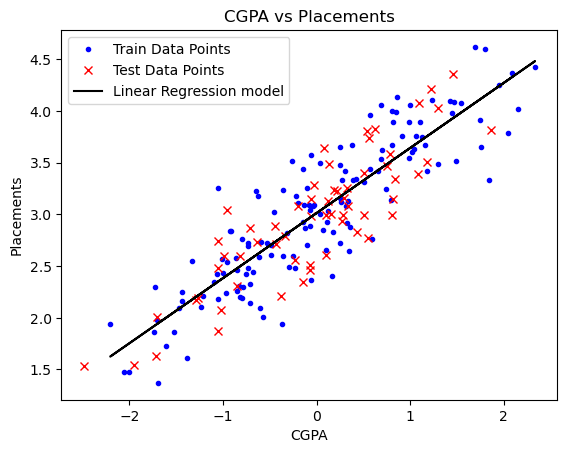

In [825]:
plt.plot(X_train, y_train, "b.", label="Train Data Points")
plt.plot(X_test, y_test, "rx", label="Test Data Points")

plt.plot(X_train,y_pred_train , "k-", label="Linear Regression model")
plt.xlabel("CGPA")
plt.ylabel("Placements")
plt.title("CGPA vs Placements")
plt.legend()
plt.show()


In [826]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set the degree of the polynomial
degree = 4
# Transform features into polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_pred_train_poly = poly_model.predict(X_train_poly)
y_pred_test_poly = poly_model.predict(X_test_poly)

# Evaluate the model
print("R2 Score Train degree", degree, "::", r2_score(y_train, y_pred_train_poly))
print("R2 Score Test degree", degree, "::", r2_score(y_test, y_pred_test_poly))

# At degree 8 overfitting


R2 Score Train degree 4 :: 0.7876316700952353
R2 Score Test degree 4 :: 0.7488080080118195


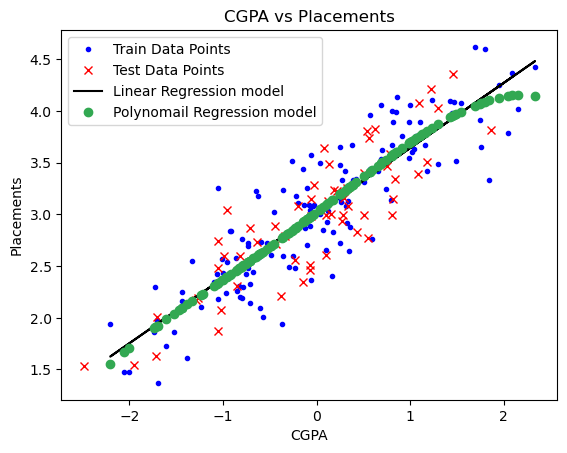

In [827]:
plt.plot(X_train, y_train, "b.", label="Train Data Points")
plt.plot(X_test, y_test, "rx", label="Test Data Points")

plt.plot(X_train,y_pred_train , "k-", label="Linear Regression model")
# plt.plot(X_train,y_pred_train_poly , "o", label="Polynomail Regression model", color='magenta')
# plt.plot(X_train,y_pred_train_poly , "o", label="Polynomail Regression model", color=(1.0, 0.5, 0.0))
plt.plot(X_train,y_pred_train_poly , "o", label="Polynomail Regression model", color='#32a852')

plt.xlabel("CGPA")
plt.ylabel("Placements")
plt.title("CGPA vs Placements")

plt.legend()
plt.show()


In [828]:
# prediction using the tranformations
cgpa = [[10.0]]
scaled_cgpa = scaler.transform(cgpa)
m.predict(scaled_cgpa)

c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.72092563])

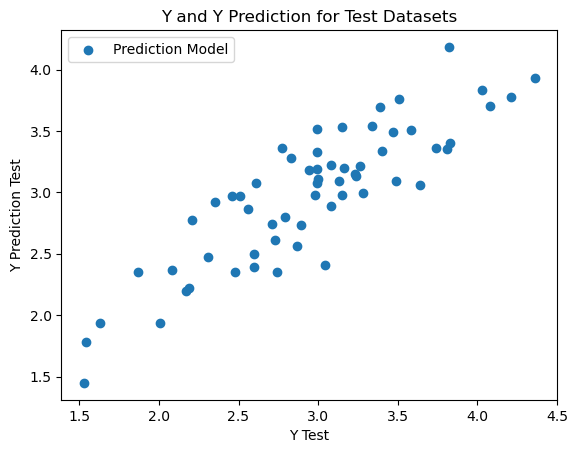

In [829]:
# Assumptions 1

# plot a scattar plot from the actual and prediction
plt.scatter(y_test, y_pred_test, label="Prediction Model")
plt.xlabel("Y Test")
plt.ylabel("Y Prediction Test")
plt.title("Y and Y Prediction for Test Datasets")
plt.legend()
plt.show()

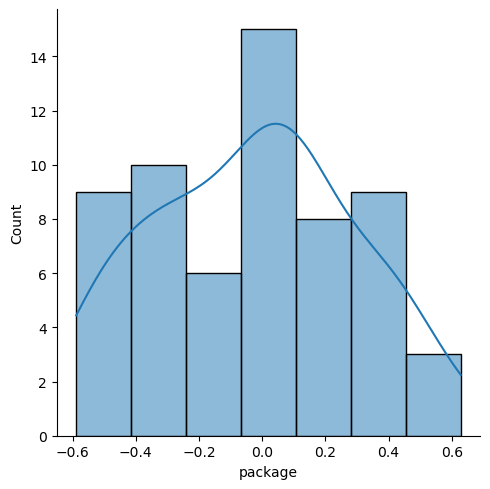

In [830]:
# Assumption 2 Residuals 
residuals = y_test - y_pred_test
import seaborn as sns
sns.displot(residuals, kde=True)

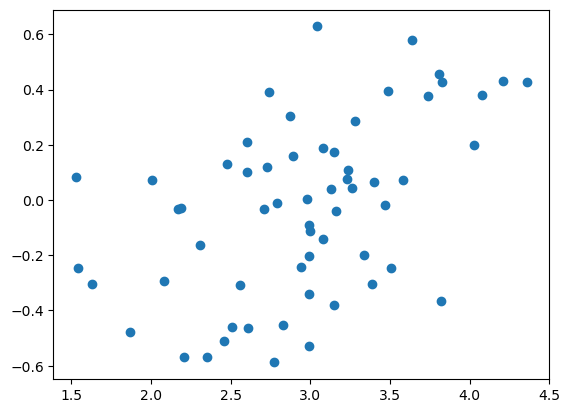

In [831]:
# Assumption 3
plt.scatter(y_test, residuals) # unifiorm distribution more scattered

# Multiple Linear Regression

In [832]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [833]:
rs_df = pd.read_csv("./Realestate.csv")
rs_df.drop("No", axis=1, inplace=True)
rs_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [834]:
rs_df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [835]:
# with the help of correlarion i can say X1 and X1 much not correlated
rs_df.drop(columns=["X1 transaction date","X2 house age"], axis=1, inplace=True)
rs_df.head()

,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,84.87882,10,24.98298,121.54024,37.9
1,306.59470,9,24.98034,121.53951,42.2
2,561.98450,5,24.98746,121.54391,47.3
3,561.98450,5,24.98746,121.54391,54.8
4,390.56840,5,24.97937,121.54245,43.1


In [836]:
rs_df.corr()

,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X3 distance to the nearest MRT station,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.673613,0.571005,0.546307,0.523287,1.000000


In [837]:
rs_df.describe()

,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1083.885689,4.094203,24.969030,121.533361,37.980193
std,1262.109595,2.945562,0.012410,0.015347,13.606488
min,23.382840,0.000000,24.932070,121.473530,7.600000
25%,289.324800,1.000000,24.963000,121.528085,27.700000
50%,492.231300,4.000000,24.971100,121.538630,38.450000
75%,1454.279000,6.000000,24.977455,121.543305,46.600000
max,6488.021000,10.000000,25.014590,121.566270,117.500000


In [838]:
rs_df.isnull().sum()

X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [839]:
X = rs_df.iloc[:,:-1]
y = rs_df.iloc[:,-1]
X.shape, y.shape

((414, 4), (414,))

In [840]:
#  split the datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)
X_train.shape, y_train.shape

((289, 4), (289,))

In [841]:
# Standardize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [842]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

m = LinearRegression()
m.fit(X_train, y_train)
y_pred_train = m.predict(X_train)
y_pred_test = m.predict(X_test)

print("R2 Score for Train Data :: ", r2_score(y_train, y_pred_train))
print("R2 Score for Test Data :: ", r2_score(y_test, y_pred_test))



R2 Score for Train Data ::  0.5381191284207296
R2 Score for Test Data ::  0.48497285956918645


# California Database

In [843]:
from sklearn.datasets import fetch_california_housing

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [844]:
ds = fetch_california_housing()
ds.keys()
ds.target_names

['MedHouseVal']

In [845]:
columns = np.array(ds.feature_names)
# columns = np.hstack((columns, ds.target_names))
data = np.array(ds.data)
# data = np.hstack((data ,ds.target.reshape(-1,1)))

# columns

In [846]:
housing_df = pd.DataFrame(data=data, columns=columns)
housing_df["Price"] = ds.target
# housing_df = housing_df.iloc[:-20000]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [847]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [848]:
housing_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [849]:
housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

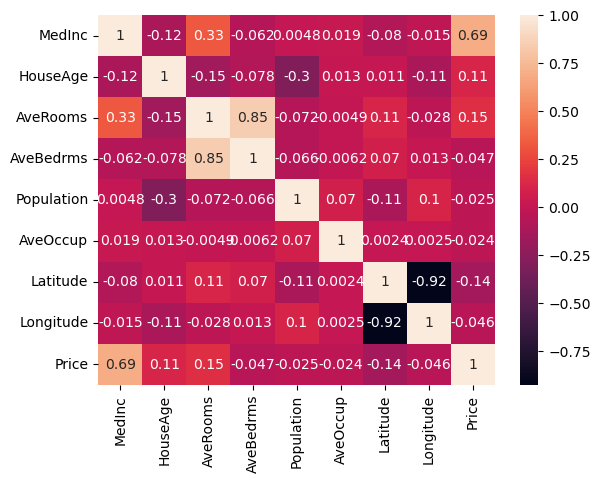

In [850]:
# import seaborn as sns
# sns.pairplot(housing_df)
sns.heatmap(housing_df.corr(), annot=True)

In [851]:
drop_column = ["AveBedrms", "Population", "AveOccup"]

# housing_df.drop(columns=drop_column, axis=1, inplace=True)

X = housing_df.iloc[:,:-1]
y = housing_df.iloc[:,-1]
X.shape, y.shape
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [852]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=10)
X_train.shape, y_train.shape

((13828, 8), (13828,))

In [853]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [854]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

m = LinearRegression()
m.fit(X_train, y_train)
y_pred_train = m.predict(X_train)
y_pred_test = m.predict(X_test)

print("R2 score Train:: ", r2_score(y_train, y_pred_train))
print("R2 score Test:: ", r2_score(y_test, y_pred_test))



R2 score Train::  0.6107081709724277
R2 score Test::  0.593595852643664


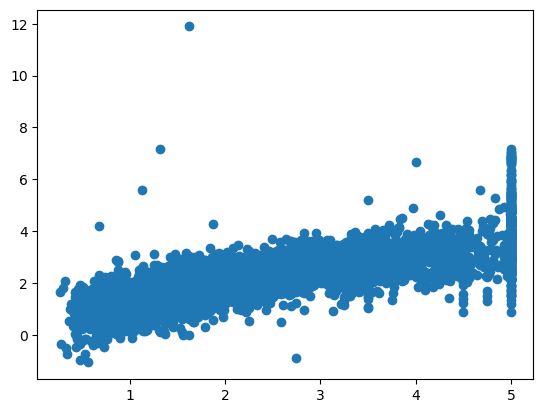

In [856]:
plt.scatter(y_test, y_pred_test)
# Assumptions 
# Scattar plt should be linear (between ytes and ypredtest)
# residulas kde plot should be normalize not skewd
# plot of ytest and residulas should be uniform (not follow any pattern)

# Pickling Concept

In [859]:
import pickle
pickle.dump(m, open("linear.pkl", 'wb'))

In [862]:

model11 = pickle.load(open("linear.pkl", 'rb'))
# Now we can use it as a linear regression we can load it from anywhere

In [863]:
model11.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

# Basic Regression Project 